# implementation of simple linear regression - 2

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# read the dataset

df = pd.read_csv("height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


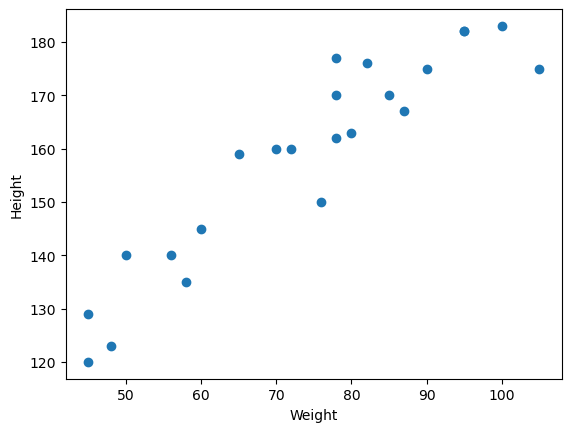

In [4]:
plt.scatter(df.Weight, df.Height)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()


In [5]:
# Problem Statement  >> I want to predict height based on weight

In [6]:
x = df[["Weight"]]
y = df["Height"]

In [7]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [8]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [9]:
# 1. read the data
# 2. EDA 
# 3. Data preperation 
# 4. x & y split the data 
# 5. train-tesst split 
# 6. sacling (optional)
# 7. model training
# 8. model evalution

In [10]:
# train- test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [11]:
x_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [12]:
x_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50


In [13]:
y_train

10    176
4     160
2     123
18    150
6     163
7     175
1     135
14    170
0     120
15    177
22    160
21    140
9     170
8     182
12    175
11    182
5     162
Name: Height, dtype: int64

In [14]:
y_test

20    129
17    159
3     145
13    183
19    167
16    140
Name: Height, dtype: int64

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [16]:
# scalling (optional) >> standardization
# in machine learning fit was the to learn the coefficient
# in scalling fit >> was to learn meu and sigma
# transform >>applying mue, and sigma or calculation/computation meu & sigma
# in train data >> we use both fit_transform
# but in test data >> we only use transform >> if we here use the fit then
# here arries data leakage so avoid it
# most of the ml model standardscaler is ussed as it deals with nomrmal distribution

In [17]:
# scalling 
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler

StandardScaler()

In [20]:
# how to scale
x_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [21]:
#scaling should be done always after train test split
# target variable should not be scaled
# avoid scaling categorical features
x_train = scaler.fit_transform(x_train)  # for train data use fit_transform
x_test = scaler.transform(x_test)  # for test data use transform

In [22]:
x_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [23]:
x_test

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

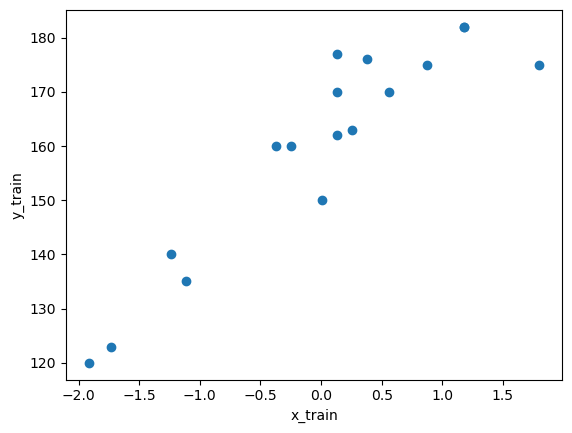

In [24]:
# scalling is optional >> because it doesnot affect the distribution of the data
plt.scatter(x_train, y_train)
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.show()
# scalled data

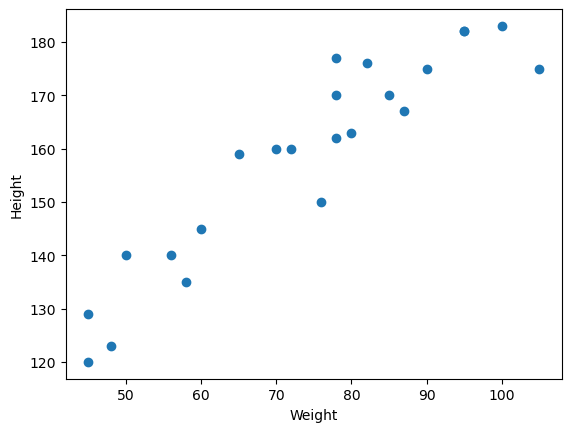

In [25]:
# without scalled data 
plt.scatter(df.Weight, df.Height)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [26]:
# insights >> Pattern of scalled or non scalled data are same it don't affect the data

In [27]:
# model training

from sklearn.linear_model import LinearRegression

# linear regression parameter
#fit_intercept>> the best fit line will have intercept,by default it is true
# copy_x >> copy the original x_train and then build the model, it will not modify 
# the original data
# n_jobs >> -1 means using all processor.
# positive >> when set to true, forces the coefficients to be positive.
# fit >> train the model
# pridict >> test the model

# after bulding the model, you have attributes of the model
# coef_
# intercept_

In [28]:
regressor = LinearRegression()
regressor

LinearRegression()

In [29]:
regressor.fit(x_train, y_train)

LinearRegression()

In [30]:
regressor.coef_

array([17.7307072])

In [31]:
regressor.intercept_

np.float64(160.0)

In [32]:
print("The slope or coeff of model is", regressor.coef_)
print("The intercept of the model is", regressor.intercept_)

The slope or coeff of model is [17.7307072]
The intercept of the model is 160.0


In [33]:
# prediction on train data 
# interpretation of coef >> one uint increase in weight, on an avg. the height increase by 17.730 unit
# predicted height(y) on x_train = 160 + 17.73 * (x_train)
# predicted height(y) on x_test = 160 + 17.73 * (x_test)

In [34]:
# prediction on train data
regressor.predict(x_train)

array([166.65863288, 153.47066096, 129.29271243, 160.06464692,
       164.46063756, 175.45061417, 140.28268904, 169.95562586,
       125.99571945, 162.26264224, 155.66865628, 138.08469371,
       162.26264224, 180.94560247, 191.93557907, 180.94560247,
       162.26264224])

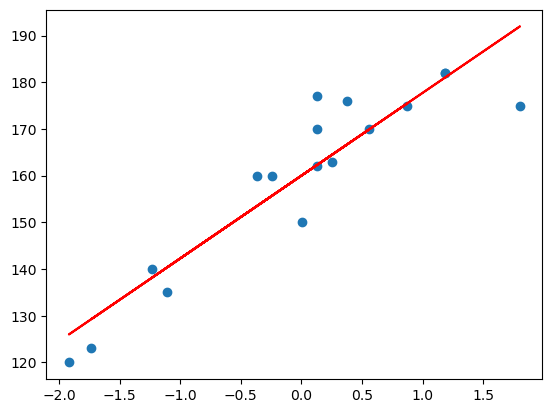

In [35]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color = "red")

In [36]:
y_pred_test = regressor.predict(x_test)

In [37]:
y_pred_test

array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
       172.15362118, 131.49070775])

In [38]:
y_pred_test, y_test

(array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
        172.15362118, 131.49070775]),
 20    129
 17    159
 3     145
 13    183
 19    167
 16    140
 Name: Height, dtype: int64)

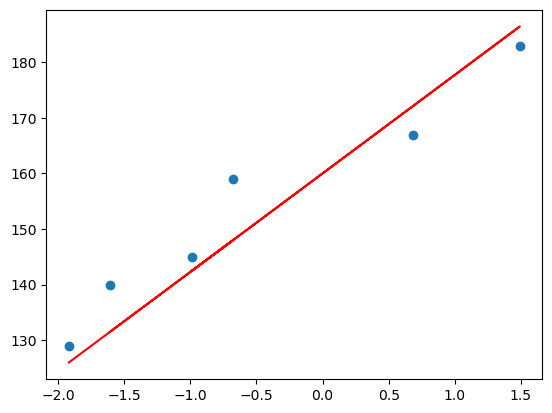

In [39]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regressor.predict(x_test), color = "red")

In [40]:
# performance metrices  # how your model performe actually

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [43]:
mean_absolute_error(y_test, y_pred_test)

np.float64(5.608571289304824)

In [44]:
 mean_squared_error(y_test, y_pred_test)

np.float64(41.28566283045539)

In [50]:
r2 = r2_score(y_test, y_pred_test)  # rsquare = 1-ssr/sst
r2

0.872103617425661

In [51]:
#asdjusted rsquare
# adjusted r2 = [1-(1 - rsquare)*n-1/(n-k-1)]  # n is no. of observation
# and k is no. of predictor variable

In [53]:
x_test.shape[1]

1

In [55]:
1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1] - 1)
# adjusted rquare is lesser than rsquare

0.8401295217820762

In [56]:
# Assumption
# x-y should have Linear relationship
# Observation should have no relation
# error sholud have constant variation
# error sholud be normally distributed 
# features among themself should be least realted

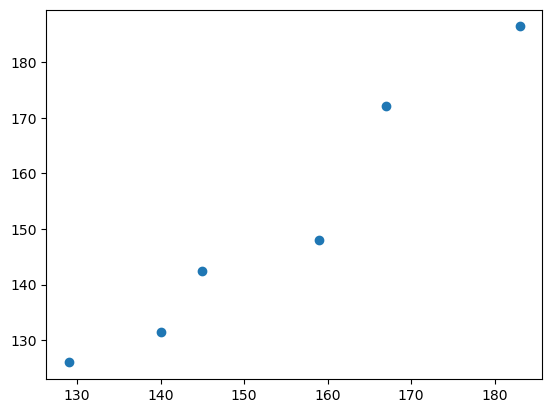

In [59]:
plt.scatter(y_test, y_pred_test)
# to check if y_test and its prediction alighns

In [ ]:
# error sholud have constant variation
# error sholud be normally distributed 

In [60]:
error = y_test - y_pred_test
error

20     3.004281
17    11.024327
3      2.519316
13    -3.440591
19    -5.153621
16     8.509292
Name: Height, dtype: float64

C:\Users\RAVISH\AppData\Local\Temp\ipykernel_16216\4021208411.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error) # apporximately a normal distribution


<Axes: xlabel='Height', ylabel='Density'>

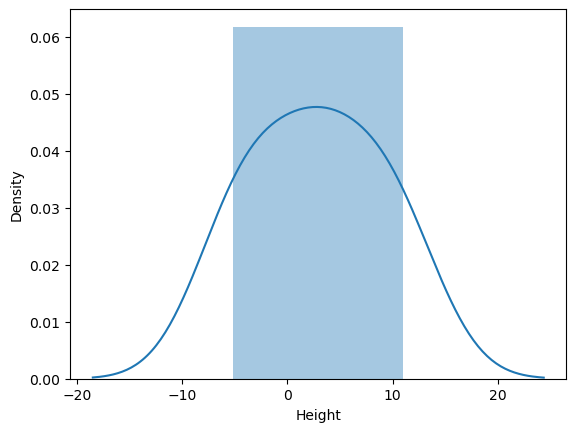

In [62]:
import seaborn as sns
sns.distplot(error) # apporximately a normal distribution

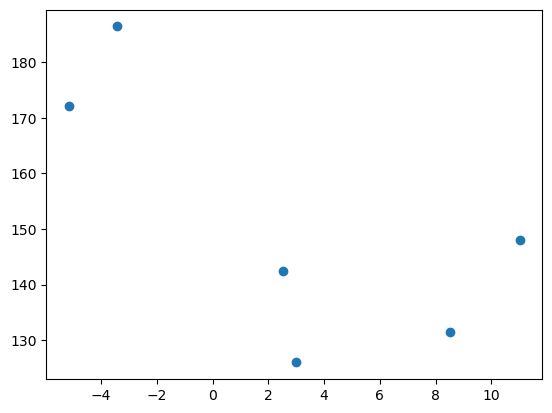

In [64]:
# to check constsnt varaince
plt.scatter(error, y_pred_test)